In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import nltk
import openpyxl
from nltk import bigrams
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

In [93]:
df=pd.read_csv(r"D:\ExcelR Data Science\Project\Sentiment Analysis\tweet.csv")

In [94]:
df.head()

tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative

In [95]:
df.shape

(81408, 2)

In [96]:
pattern = r'@[\w]+'

# Remove person names from each tweet
df['cleaned_tweets'] = df['tweets'].apply(lambda tweet: re.sub(pattern, '', tweet))




In [97]:
df.head()

tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                      cleaned_tweets  
0  Be aware  dirty step to get money  #staylight ...  
1  #sarcasm for #people who don't understand #diy...  
2    #DailyMail readers being sensible as always ...  
3   Why do I get the feeling you like games? #sar...  
4   -  You probably just missed the text. #sarcastic

In [98]:
def clean(tweet): 
  

    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    #emojis
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    tweet =  emoji_pattern.sub(r'', tweet)
    
    # usernames mentions like "@abc123"
    ment = re.compile(r"(@[A-Za-z0-9]+)")
    tweet =  ment.sub(r'', tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # html tags
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    tweet = re.sub(html, '', tweet)
    
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r'https?://\S+|www\.\S+','', tweet)
        
    #Punctuations and special characters
    
    tweet = re.sub('[%s]' % re.escape(string.punctuation),'',tweet)
    
    tweet = tweet.lower()
    
    splits = tweet.split()
    splits = [word for word in splits if word not in set(nltk.corpus.stopwords.words('english'))]
    tweet = ' '.join(splits)
    
    
    return tweet


In [99]:
df['cleaned_tweets']=df['cleaned_tweets'].apply(clean)

In [100]:
df.head()

tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   

                                      cleaned_tweets  
0  aware dirty step get money staylight staywhite...  
1            sarcasm people understand diy artattack  
2  dailymail readers sensible always shocker sarc...  
3                     get feeling like games sarcasm  
4                     probably missed text sarcastic

(-1.110066617084486,
 1.1080988983371896,
 -1.1098108725930427,
 1.1270099583936328)

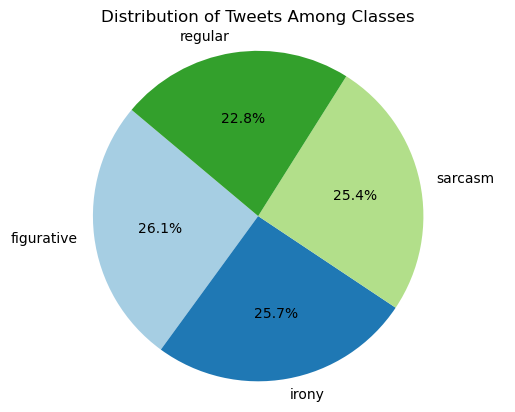

In [101]:
#Data Visualization

class_count=df['class'].value_counts()

plt.pie(class_count, labels=class_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Tweets Among Classes')
plt.axis('equal')

In [102]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

In [103]:
df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x:str(x).split())
df['cleaned_tweets']=df['cleaned_tweets'].apply(remove_stopword)

In [104]:

wnl = WordNetLemmatizer()
df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: [wnl.lemmatize(word)for word in x])
df.head(10)

tweets       class  \
0  Be aware  dirty step to get money  #staylight ...  figurative   
1  #sarcasm for #people who don't understand #diy...  figurative   
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative   
3  @wilw Why do I get the feeling you like games?...  figurative   
4  -@TeacherArthurG @rweingarten You probably jus...  figurative   
5  Tune in to Nigezie and be treated to Rachel Pl...  figurative   
6  What iz thiz?!?!? A friggin DC love fest??!?!?...  figurative   
7  man, i wish i could sexually harass an intoxic...  figurative   
8  @raaachf for the car ride when I get to listen...  figurative   
9  Aamir calls #BajrangiBhaijaan as Salman's best...  figurative   

                                      cleaned_tweets  
0  [aware, dirty, step, get, money, staylight, st...  
1      [sarcasm, people, understand, diy, artattack]  
2  [dailymail, reader, sensible, always, shocker,...  
3                [get, feeling, like, game, sarcasm]  
4                [probably, missed, text, sarcastic]  
5  [tune, nigezie, treated, rachel, plattens, fig...  
6  [iz, thiz, friggin, dc, love, fest, sarcasm, m...  
7  [man, wish, could, sexually, harass, intoxicat...  
8  [car, ride, get, listen, jess, whole, time, ye...  
9  [aamir, call, bajrangibhaijaan, salmans, best,...

In [105]:
df['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

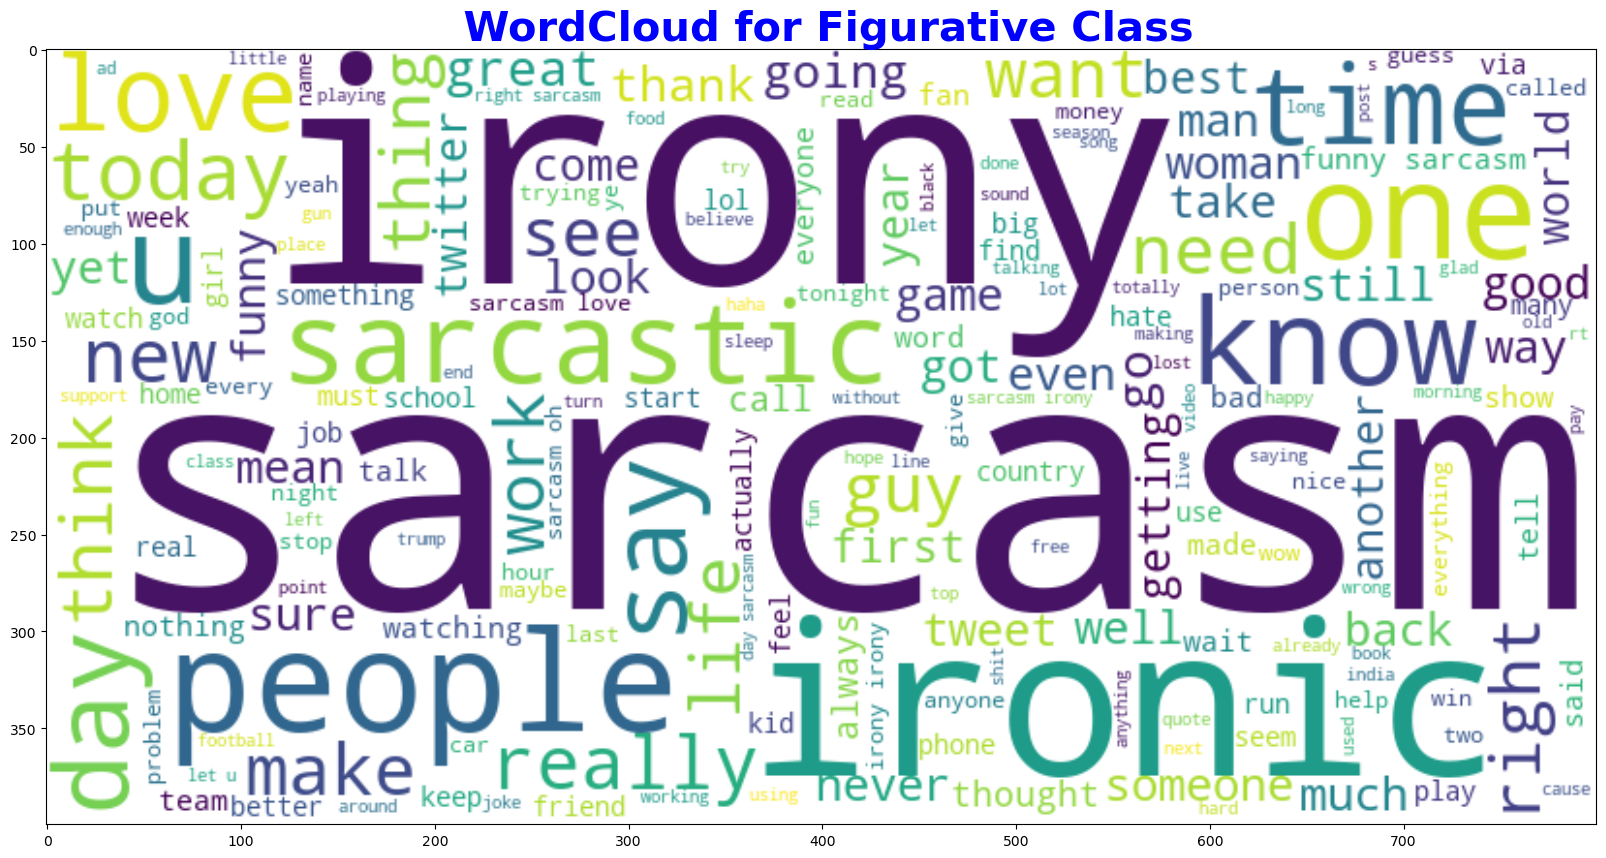

In [106]:
figurative_df = df[df['class'] == 'figurative']

text = ' '.join(' '.join(tweet) for tweet in figurative_df['cleaned_tweets'])
wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)
plt.figure(figsize = (20,20)) 
plt.title(" WordCloud for Figurative Class",fontsize=30,fontweight='bold', color='blue')
plt.imshow(wc , interpolation = 'bilinear')

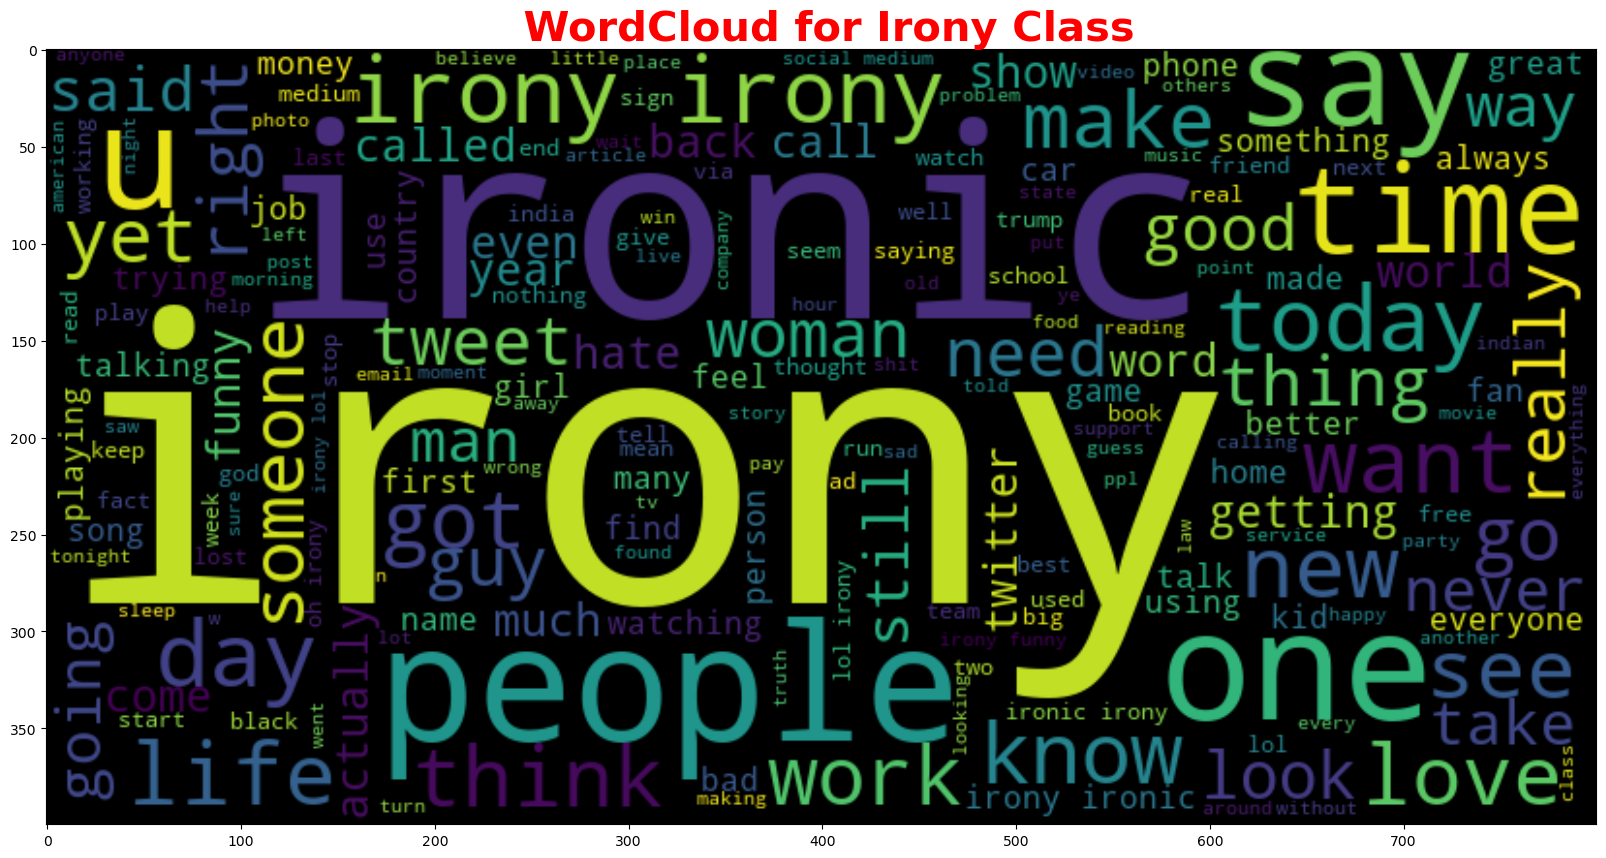

In [107]:
irony_df = df[df['class'] == 'irony']

text = ' '.join(' '.join(tweet) for tweet in irony_df['cleaned_tweets'])
wc = WordCloud(width=800, height=400, max_words=200, background_color='black').generate(text)
plt.figure(figsize = (20,20)) 
plt.title(" WordCloud for Irony Class",fontsize=30,fontweight='bold', color='red')
plt.imshow(wc , interpolation = 'bilinear')

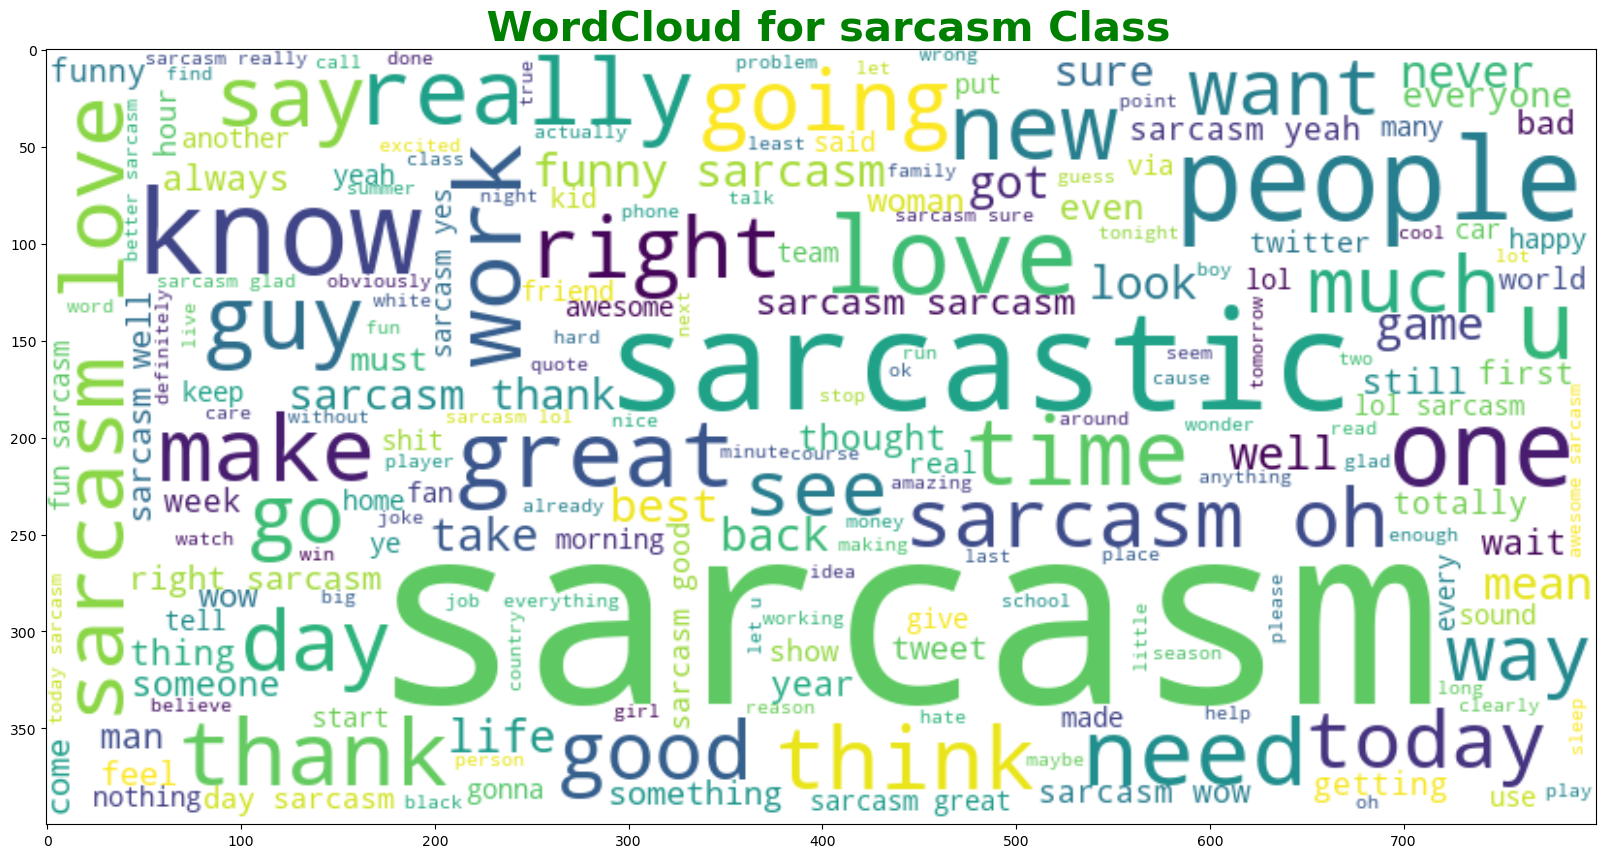

In [108]:
sarcasm_df = df[df['class'] == 'sarcasm']

text = ' '.join(' '.join(tweet) for tweet in sarcasm_df['cleaned_tweets'])
wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)
plt.figure(figsize = (20,20)) 
plt.title(" WordCloud for sarcasm Class",fontsize=30,fontweight='bold', color='green')
plt.imshow(wc , interpolation = 'bilinear')

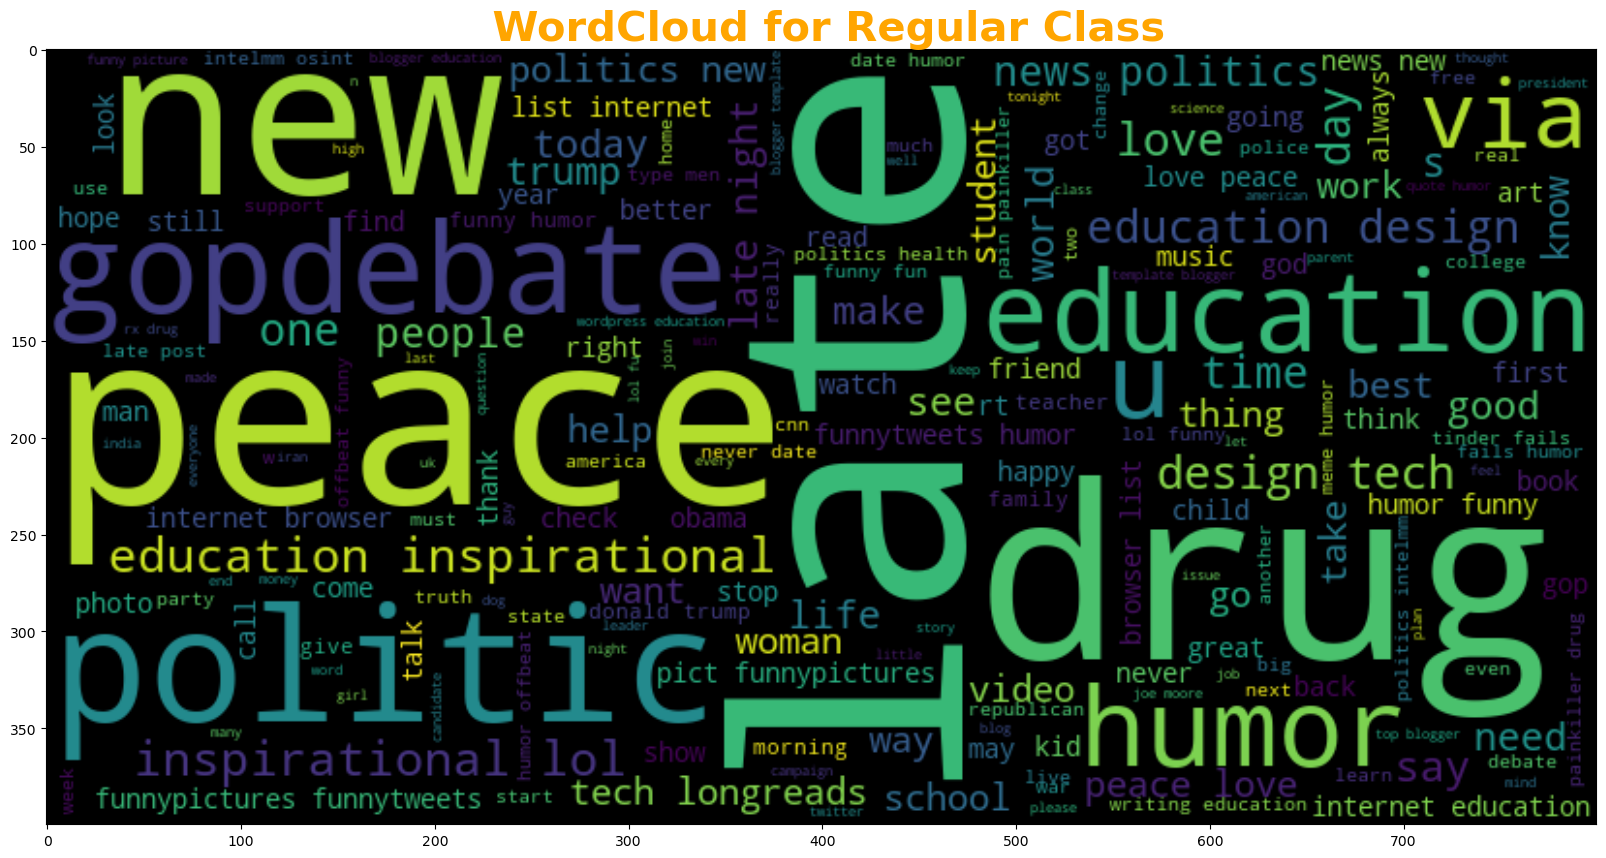

In [109]:
regular_df = df[df['class'] == 'regular']

text = ' '.join(' '.join(tweet) for tweet in regular_df['cleaned_tweets'])
wc = WordCloud(width=800, height=400, max_words=200, background_color='black').generate(text)
plt.figure(figsize = (20,20)) 
plt.title(" WordCloud for Regular Class",fontsize=30,fontweight='bold', color='orange')
plt.imshow(wc , interpolation = 'bilinear')

In [110]:
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

### Unigram Analysis and Vizualization

In [113]:
from collections import Counter
top = Counter([item for sublist in df['cleaned_tweets'] for item in sublist])
temp = pd.DataFrame(top.most_common())
temp.columns = ['Unigram','Frequency']
temp.style.background_gradient(cmap='Blues')
excel_file_path = r"D:\ExcelR Data Science\Project\Sentiment Analysis\Ngram_frequencies.xlsx"
temp.to_excel(excel_file_path, index=False)

print(f"DataFrame saved as {excel_file_path}")


DataFrame saved as D:\ExcelR Data Science\Project\Sentiment Analysis\Ngram_frequencies.xlsx


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sarcasm'),
  Text(1, 0, 'irony'),
  Text(2, 0, 'ironic'),
  Text(3, 0, 'news'),
  Text(4, 0, 'love'),
  Text(5, 0, 'like'),
  Text(6, 0, 'people'),
  Text(7, 0, 'get'),
  Text(8, 0, 'peace'),
  Text(9, 0, 'late'),
  Text(10, 0, 'day'),
  Text(11, 0, 'u'),
  Text(12, 0, 'drug'),
  Text(13, 0, 'humor'),
  Text(14, 0, 'education'),
  Text(15, 0, 'one'),
  Text(16, 0, 'politics'),
  Text(17, 0, 'funny'),
  Text(18, 0, 'time'),
  Text(19, 0, 'would')])

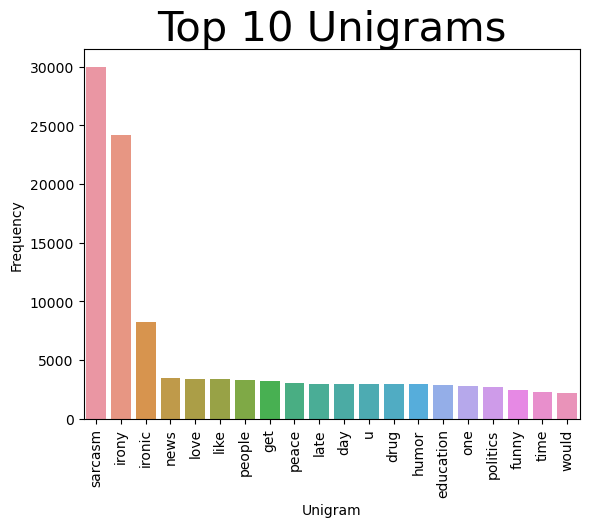

In [114]:
top_20 = temp.head(20)
sns.barplot(x = top_20.Unigram, y = top_20.Frequency, data =top_20)
plt.title('Top 10 Unigrams', fontsize = 30)
plt.xticks(rotation = 90)

## Bigram Analysis and Vizualization

In [115]:
tokens = [item for sublist in df['cleaned_tweets'] for item in sublist]
bi_grams = list(bigrams(tokens))
bi_gram_counter = Counter(bi_grams)
top_bigrams = bi_gram_counter.most_common()

top_bigrams_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

excel_file_path = r'D:\ExcelR Data Science\Project\Sentiment Analysis\Ngram_frequencies.xlsx'
book = openpyxl.load_workbook(excel_file_path)

with pd.ExcelWriter(excel_file_path, engine='openpyxl') as writer:
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    top_bigrams_df.to_excel(writer, sheet_name='bigrams', index=False)

    writer.save()

print(f"Top bigrams saved to '{excel_file_path}' in a new sheet named 'bigrams'")


Top bigrams saved to 'D:\ExcelR Data Science\Project\Sentiment Analysis\Ngram_frequencies.xlsx' in a new sheet named 'bigrams'


In [116]:
top_bigrams_df.head(10)

Bigram  Frequency
0              (irony, irony)        634
1             (sarcasm, love)        532
2            (funny, sarcasm)        511
3               (sarcasm, oh)        489
4  (education, inspirational)        432
5        (inspirational, lol)        430
6              (design, tech)        387
7                    (let, u)        369
8         (education, design)        365
9          (sarcasm, sarcasm)        346

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, "('irony', 'irony')"),
  Text(1, 0, "('sarcasm', 'love')"),
  Text(2, 0, "('funny', 'sarcasm')"),
  Text(3, 0, "('sarcasm', 'oh')"),
  Text(4, 0, "('education', 'inspirational')"),
  Text(5, 0, "('inspirational', 'lol')"),
  Text(6, 0, "('design', 'tech')"),
  Text(7, 0, "('let', 'u')"),
  Text(8, 0, "('education', 'design')"),
  Text(9, 0, "('sarcasm', 'sarcasm')"),
  Text(10, 0, "('right', 'sarcasm')"),
  Text(11, 0, "('look', 'like')"),
  Text(12, 0, "('news', 'politics')"),
  Text(13, 0, "('day', 'sarcasm')"),
  Text(14, 0, "('sarcasm', 'well')"),
  Text(15, 0, "('irony', 'ironic')"),
  Text(16, 0, "('cannot', 'wait')"),
  Text(17, 0, "('late', 'night')"),
  Text(18, 0, "('sarcasm', 'good')"),
  Text(19, 0, "('social', 'medium')")])

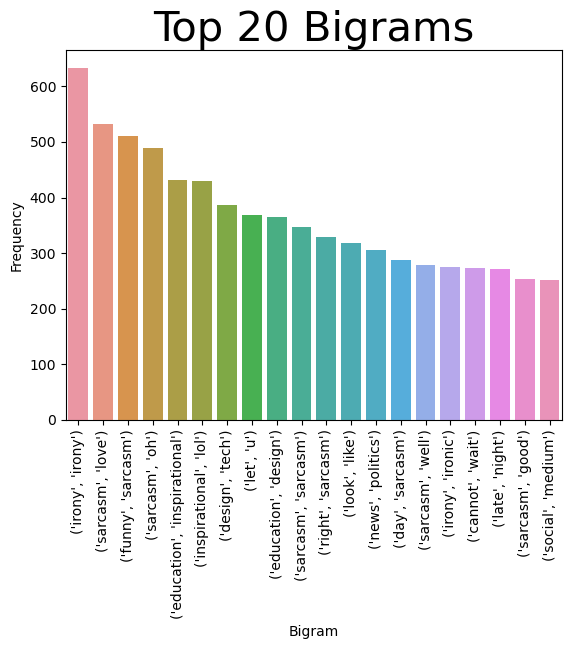

In [117]:
bigram_top_20 = top_bigrams_df.head(20)
sns.barplot(x = bigram_top_20.Bigram, y = bigram_top_20.Frequency, data =bigram_top_20)
plt.title('Top 20 Bigrams', fontsize = 30)
plt.xticks(rotation = 90)

### Trigram Analysis and Vizulization

In [118]:
tokens = [item for sublist in df['cleaned_tweets'] for item in sublist]
tri_grams = list(ngrams(tokens,3))
tri_gram_counter = Counter(tri_grams)
top_trigrams = tri_gram_counter.most_common()

top_trigrams_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

excel_file_path = r"D:\ExcelR Data Science\Project\Sentiment Analysis\Ngram_frequencies.xlsx"
book = openpyxl.load_workbook(excel_file_path)

# Create a new Excel writer and add the DataFrame to a new sheet
with pd.ExcelWriter(excel_file_path, engine='openpyxl') as writer:
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    
    top_trigrams_df.to_excel(writer, sheet_name='Trigrams', index=False)

    # Save the changes
    writer.save()

print(f"Top Trigrams saved to '{excel_file_path}' in a new sheet named 'Trigrams'")

Top Trigrams saved to 'D:\ExcelR Data Science\Project\Sentiment Analysis\Ngram_frequencies.xlsx' in a new sheet named 'Trigrams'


In [119]:
top_trigrams_df.head(10)

Trigram  Frequency
0       (education, inspirational, lol)        430
1             (education, design, tech)        363
2             (design, tech, longreads)        226
3               (inspirational, lol, …)        225
4   (funnypictures, funnytweets, humor)        179
5    (pict, funnypictures, funnytweets)        158
6             (internet, browser, list)        146
7             (browser, list, internet)        146
8           (list, internet, education)        146
9  (internet, education, inspirational)        145

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, "('education', 'inspirational', 'lol')"),
  Text(1, 0, "('education', 'design', 'tech')"),
  Text(2, 0, "('design', 'tech', 'longreads')"),
  Text(3, 0, "('inspirational', 'lol', '…')"),
  Text(4, 0, "('funnypictures', 'funnytweets', 'humor')"),
  Text(5, 0, "('pict', 'funnypictures', 'funnytweets')"),
  Text(6, 0, "('internet', 'browser', 'list')"),
  Text(7, 0, "('browser', 'list', 'internet')"),
  Text(8, 0, "('list', 'internet', 'education')"),
  Text(9, 0, "('internet', 'education', 'inspirational')"),
  Text(10, 0, "('writing', 'education', 'inspirational')"),
  Text(11, 0, "('tinder', 'fails', 'humor')"),
  Text(12, 0, "('news', 'politics', 'health')"),
  Text(13, 0, "('news', 'politics', 'intelmm')"),
  Text(14, 0, "('politics', 'intelmm', 'osint')"),
  Text(15, 0, "('pain', 'painkiller', 'drug')"),
  Text(16, 0, "('inspirational', 'lol', 'funny')"),
  Text(17, 0, "('1

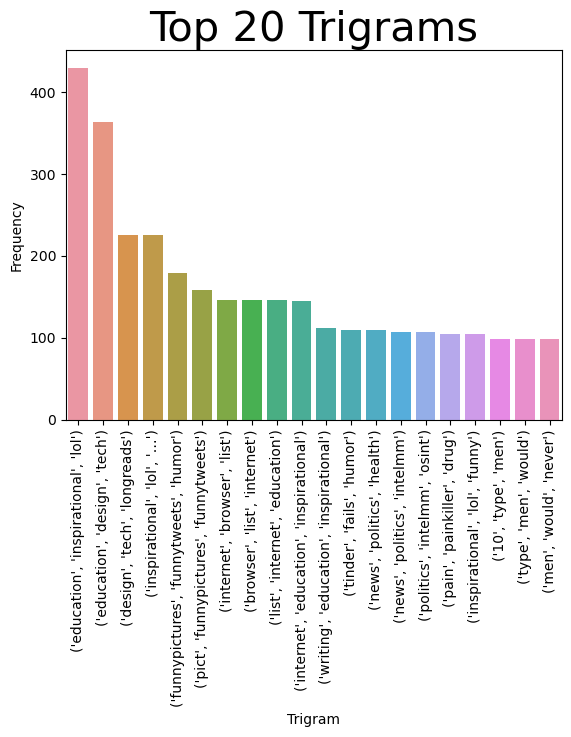

In [120]:
Trigram_top_20 = top_trigrams_df.head(20)
sns.barplot(x = Trigram_top_20.Trigram, y = Trigram_top_20.Frequency, data =Trigram_top_20)
plt.title('Top 20 Trigrams', fontsize = 30)
plt.xticks(rotation = 90)